# Shelter Animal Outcomes 6

## Decision Trees

In case you're wondering which decision tree I'm using, I'm using the
one scikit learn is providing, which accordng to it's [user guide](http://scikit-learn.org/0.15/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart) 
> scikit-learn uses an optimised version of the CART algorithm.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv('../Shelter_train.csv')
df_test = pd.read_csv('../Shelter_test.csv')

In [4]:
x = df_train.ix[:, :-1]
y = df_train.ix[:, -1]
df_test = df_test.drop('ID', 1)

In [5]:
clf = DecisionTreeClassifier()
cross_validation.cross_val_score(clf, x, y, scoring="log_loss")

array([-2.94170793, -2.90793263, -2.94280605])

In [6]:
%timeit clf.fit(x, y)

10 loops, best of 3: 20.3 ms per loop


In [18]:
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(y, 2),
              scoring='log_loss')
rfecv.fit(x, y)

<bound method RFECV.get_params of RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[4 3 ..., 5 5], n_folds=2, shuffle=False, random_state=None),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
   estimator_params=None, scoring='log_loss', step=1, verbose=0)>

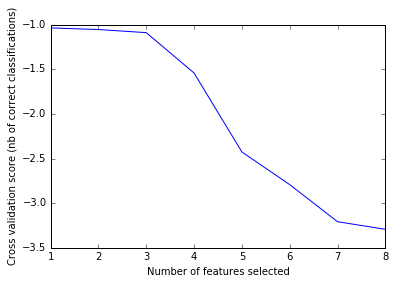

In [8]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [19]:
predictions = rfecv.predict_proba(df_test)
output = pd.DataFrame(predictions, columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])
output.index.names = ['ID']
output.index += 1
output.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.057818,0.015950,0.114212,0.085731,0.726289
2,0.587982,0.002041,0.026304,0.198186,0.185488
3,0.534001,0.001943,0.035177,0.229778,0.199100
4,0.044823,0.022411,0.135319,0.135319,0.662128
5,0.534001,0.001943,0.035177,0.229778,0.199100


In [21]:
output.to_csv('../submission-DecisionTree.2.0.csv', index_label = 'ID')

In [9]:
clf = clf.fit(x, y)
clf.feature_importances_

array([ 0.16795347,  0.61652126,  0.08076531,  0.01640879,  0.00205108,
        0.01342696,  0.06062687,  0.04224627])

In [16]:
model = SelectFromModel(DecisionTreeClassifier())
model.fit(x, y)
predictions = model.predict_proba(df_test)
output = pd.DataFrame(predictions, columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])
output.index.names = ['ID']
output.index += 1
output.head()

AttributeError: 'SelectFromModel' object has no attribute 'predict_proba'